In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

# Loading the files 

In [2]:
file = 'welldata.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head(5)

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR
2,2,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.481680,ELECTRICAL,UNKNOWN
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038,ELECTRICAL,UNKNOWN
4,4,125,ESP_2,ESP,8616.41,348,26.061750,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,PENETRATOR


In [5]:
# Solution file downloading.
sol_file = 'solution.csv'
daily_data = 'dailyData.csv'

sol = pd.read_csv(sol_file)
daily = pd.read_csv(daily_data)

In [6]:
sol.head(5)

,Well_ID,AL_Key,Fail in 30 days
0,327,ESP_1,0
1,125,ESP_2,1
2,260,ESP_3,0
3,21,ESP_1,1
4,16,ESP_1,0


In [7]:
daily

,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,AL_Key,Well_ID
0,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
1,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
2,1007.769762,1047.068544,667.933899,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
3,1514.641876,1370.143160,1122.137652,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
4,1089.741764,1387.138130,1156.169599,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50051,130.568357,335.639084,433.161488,ESP,0.0,232.000000,433.000000,894.599976,240.0,182.800003,55.000000,0.550000,20.000000,167.384209,444.562318,856.745525,611.946527,0.583339,0.537389,460.405623,396.339903,150.908634,184.730450,3004.191331,2598.063044,757.792307,0.059549,1703.463069,1746.331510,0.168102,18.724074,100.456000,0.207101,81.731926,168.679595,600.0,ESP_1,142
50052,135.061535,338.161005,421.979434,ESP,0.0,232.000000,433.000000,894.599976,240.0,182.800003,55.000000,0.550000,20.000000,173.144311,433.085059,858.684065,606.229370,0.586167,0.534518,458.981681,399.702384,150.441904,187.719102,3004.191331,2563.037417,754.692653,0.061011,1668.437442,1728.818696,0.171957,18.264067,100.456000,0.202013,82.191933,168.766911,600.0,ESP_1,142
50053,135.757477,341.732930,428.363835,ESP,0.0,230.433113,431.364779,893.432975,240.0,182.836947,55.000000,0.551651,20.133889,174.012642,439.638975,870.139131,613.651616,0.586430,0.533871,464.542110,405.597021,152.038065,189.694864,3004.191331,2556.744207,764.843078,0.062554,1663.311231,1725.088591,0.173214,18.452844,99.400729,0.206268,80.947885,168.672755,600.0,ESP_1,142
50054,64.788755,170.379740,221.002588,ESP,12.0,243.458937,423.202102,934.540501,240.0,186.748578,54.836954,0.549735,21.480732,83.449011,226.808990,413.161203,310.258001,0.571123,0.562801,232.527414,180.633789,80.110123,90.269617,3004.191331,2538.622702,380.889908,0.060600,1604.082202,1736.581602,0.162718,8.862240,103.032334,0.095571,94.170094,172.715382,600.0,ESP_1,142


In [8]:
sp = daily[daily['Well_ID']==21].copy()
# Code to see pump peformance. 327 - Does not fail, 125 - does. I'm checking to find some trend.

In [9]:
sp.reset_index()

,index,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,AL_Key,Well_ID
0,5899,145.075457,18.657113,10.309122,ESP,0.0,NaN,351.895609,3283.136803,NaN,192.855040,46.919415,NaN,1.0,240.341174,10.524390,0.000000,250.865564,0.000000,0.995441,0.000000,0.000000,0.000000,18.657113,2870.080628,NaN,224.194376,2.080000e-17,NaN,2080.735844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_1,21
1,5900,389.763705,227.747984,2173.364476,ESP,0.0,NaN,338.121857,3228.540972,NaN,186.749374,45.082914,NaN,2.0,644.966771,2219.030119,0.000000,2863.996890,0.000000,0.748063,0.000000,0.000000,0.000000,227.747984,2870.080628,3378.566690,2864.622107,0.000000e+00,150.025719,3303.553831,0.000000e+00,4.728501,NaN,NaN,NaN,NaN,NaN,ESP_1,21
2,5901,757.499676,435.055488,3938.692332,ESP,0.0,NaN,337.500000,3179.688063,NaN,186.138204,45.000000,NaN,2.0,1252.178320,4021.903756,0.000000,5274.082076,0.000000,0.475422,0.000000,0.000000,0.000000,435.055488,2870.080628,3712.477148,5278.478474,NaN,532.789085,3446.082605,NaN,30.942437,NaN,NaN,NaN,NaN,NaN,ESP_1,21
3,5902,753.205833,440.977871,3902.444685,ESP,0.0,NaN,337.500000,3148.640913,NaN,185.472409,45.000000,NaN,2.0,1244.247460,3985.173421,0.000000,5229.420881,0.000000,0.479576,0.000000,0.000000,0.000000,440.977871,2870.080628,3700.158280,5234.015821,NaN,551.517367,3424.399597,NaN,31.760305,NaN,NaN,NaN,NaN,NaN,ESP_1,21
4,5903,756.507642,53.067491,3742.829341,ESP,0.0,NaN,337.500000,3123.386420,NaN,185.123447,45.000000,NaN,2.0,1249.016197,3822.393840,0.000000,5071.410037,0.000000,0.494579,0.000000,0.000000,0.000000,53.067491,2870.080628,3647.366405,5075.976029,1.110000e-16,523.979985,3385.376413,0.000000e+00,29.263395,NaN,NaN,NaN,NaN,NaN,ESP_1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,6055,743.283203,415.712552,829.802298,ESP,0.0,NaN,441.412861,1068.735344,NaN,203.804516,58.855048,NaN,61.0,962.656724,850.479501,172.710901,1813.136226,0.086971,0.854109,147.513987,25.196913,58.889684,356.822868,1109.751611,2990.986498,1837.401554,0.000000e+00,1922.251154,2029.860921,1.670000e-16,38.860166,NaN,NaN,NaN,NaN,NaN,ESP_1,21
157,6056,687.427696,375.206615,795.124702,ESP,0.0,NaN,439.617276,1089.408403,NaN,203.716534,58.615637,NaN,61.0,892.495244,814.917205,122.098554,1707.412449,0.066738,0.873013,106.593590,15.504964,43.496631,331.709984,1117.208720,2995.749971,1728.505551,0.000000e+00,1906.341568,2042.579187,0.000000e+00,36.254502,NaN,NaN,NaN,NaN,NaN,ESP_1,21
158,6057,649.309520,334.363501,226.713516,ESP,0.0,NaN,438.754774,1107.444762,NaN,203.944439,58.500637,NaN,61.0,844.812222,232.351779,55.675987,1077.164001,0.049147,0.938875,52.272780,3.403207,21.735384,312.628117,1114.015810,2538.292571,1092.101044,1.670000e-16,1430.847810,1822.868666,1.110000e-16,17.192804,NaN,NaN,NaN,NaN,NaN,ESP_1,21
159,6058,652.821205,347.319575,547.573891,ESP,0.0,NaN,439.649800,1126.894722,NaN,204.114361,58.619973,NaN,61.0,851.350424,561.178250,71.208009,1412.528674,0.047992,0.909317,64.750639,6.457369,27.466538,319.853037,1139.478187,2840.748328,1429.993481,1.110000e-16,1713.853606,1983.821525,2.220000e-16,26.964863,NaN,NaN,NaN,NaN,NaN,ESP_1,21


In [10]:
sp['GOR'] = (sp['GAS']/sp['OIL'])

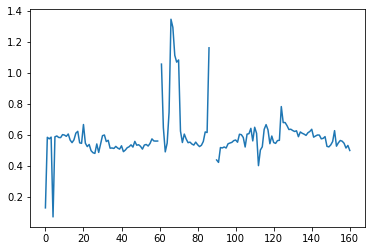

In [11]:
plt.plot(sp['GOR'].values)

In [12]:
# Data cleaning and feature engineering

In [13]:
data_copy = df.copy()

sol_copy = sol.copy()

daily_copy = daily.copy()

In [14]:
data_copy.sort_values('Well_ID')
# One hot encode the failure types and details.

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail
17,17,0,ESP_1,ESP,7649.74,445,12.759959,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,CABLE
128,128,1,ESP_2,ESP,8593.57,415,17.861990,NaN,73.0,1835.0,208.0,0.392309,ELECTRICAL,MOTOR
73,73,4,ESP_2,ESP,7418.04,351,19.130100,NaN,67.1,2626.0,270.0,NaN,ELECTRICAL,MOTOR LEAD EXTENSION (MLE)
100,100,5,ESP_1,ESP,7925.35,445,10.368719,60.0,75.0,1393.0,161.0,NaN,ELECTRICAL,UNKNOWN
109,109,6,ESP_1,ESP,8528.73,415,18.051378,NaN,NaN,NaN,NaN,11.671727,PUMP,SHAFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,353,ESP_1,ESP,8568.90,0,11.656274,NaN,NaN,NaN,NaN,0.404539,ELECTRICAL,CABLE
26,26,354,ESP_1,ESP,7376.19,400,13.341886,NaN,NaN,NaN,NaN,143.251918,ELECTRICAL,MOTOR
126,126,361,ESP_1,ESP,7499.00,415,18.468490,NaN,NaN,NaN,NaN,0.166860,TUBING,BODY
132,132,362,ESP_1,ESP,8411.17,267,19.403547,NaN,67.1,2626.0,270.0,NaN,TUBING,BODY


In [15]:
data_copy.loc[data_copy['Well_ID'].duplicated()]

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail
6,6,165,ESP_2,ESP,8814.55,351,23.472619,NaN,67.1,2626.0,270.0,NaN,ELECTRICAL,MOTOR
8,8,138,ESP_2,ESP,8718.55,287,23.571040,NaN,67.1,2626.0,270.0,NaN,PUMP,STAGE
10,10,260,ESP_3,ESP,8703.25,488,20.952037,NaN,67.1,2626.0,270.0,NaN,PUMP,COUPLING (BOX)
13,13,85,ESP_2,ESP,7583.02,317,36.113674,NaN,52.0,1508.0,442.0,NaN,TUBING,PROFILE NIPPLE
29,29,10,ESP_2,ESP,7605.56,418,19.098589,NaN,91.0,1222.0,167.0,0.228379,ELECTRICAL,MOTOR
32,32,107,ESP_2,ESP,7779.21,415,19.141534,NaN,91.0,1222.0,167.0,NaN,TUBING,BODY
34,34,352,ESP_2,ESP,7874.24,410,16.041146,NaN,73.0,1680.0,191.0,NaN,ELECTRICAL,CABLE
52,52,113,ESP_2,ESP,8621.67,0,7.107809,NaN,NaN,NaN,NaN,0.991308,ELECTRICAL,MOTOR
54,54,339,ESP_2,ESP,8659.40,0,6.533299,NaN,NaN,NaN,NaN,2.229769,ELECTRICAL,MOTOR
61,61,353,ESP_2,ESP,8512.84,0,18.398652,NaN,NaN,NaN,NaN,0.465697,ELECTRICAL,MOTOR LEAD EXTENSION (MLE)


In [16]:
sol_copy.sort_values('Well_ID')
sol_copy['Fail in 30 days'] = 0

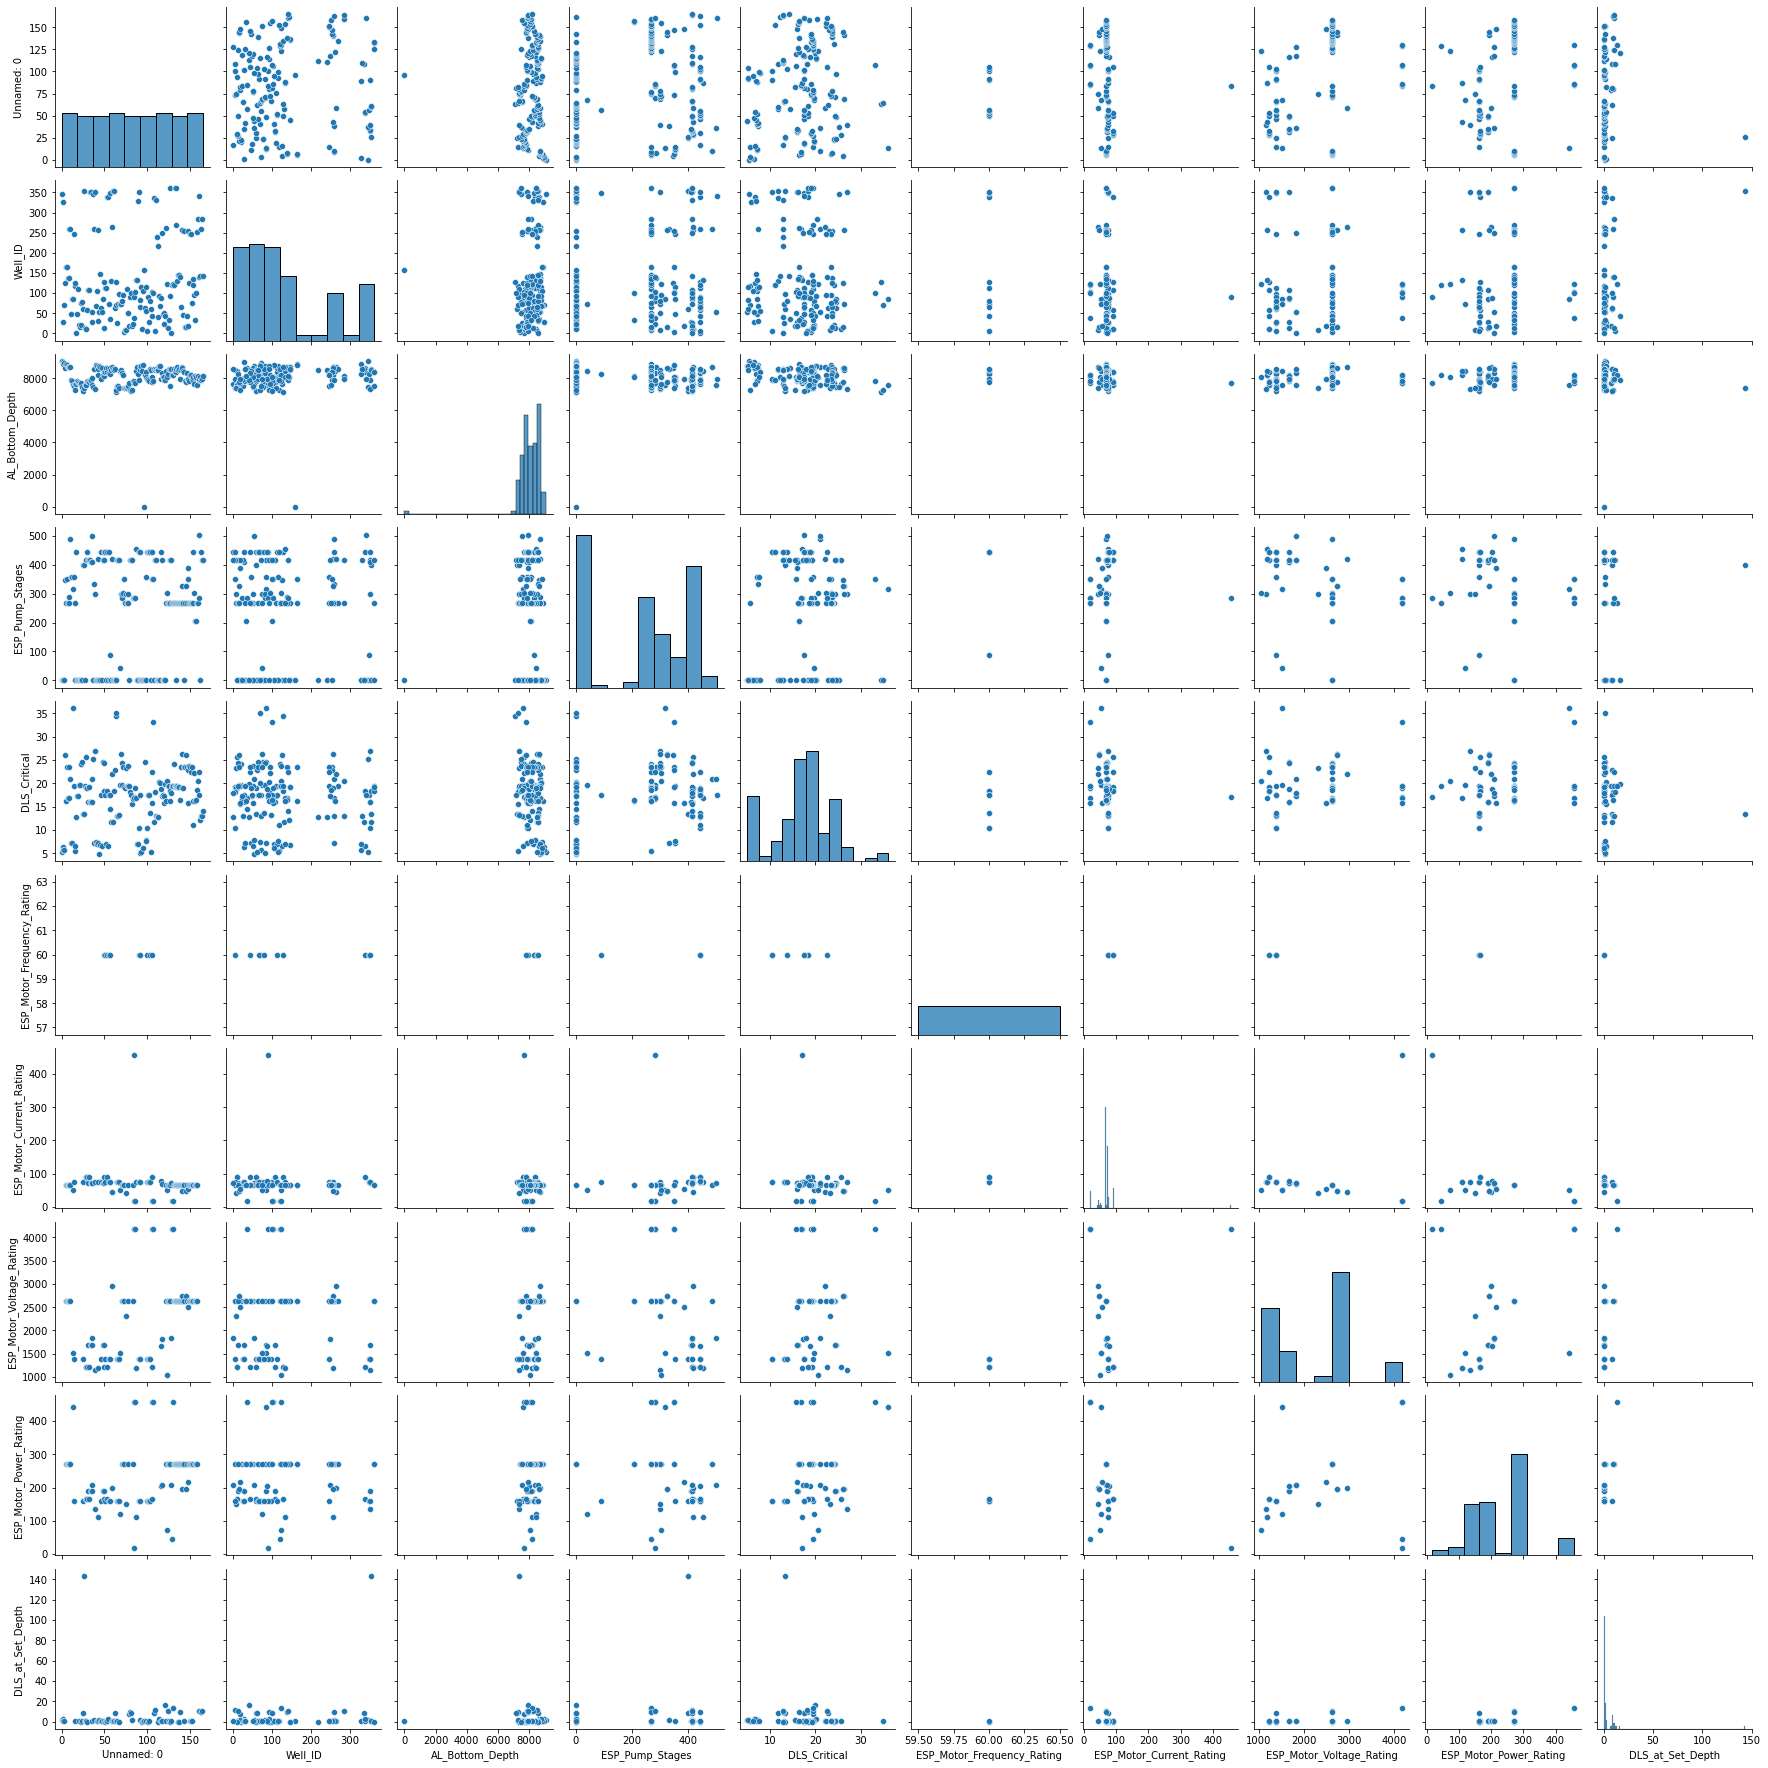

In [17]:
sns.pairplot(data_copy)

In [18]:
# Assigning an extra feature (initially all assumed to not fail)
data_copy['Fail in 30 days'] = 0


In [19]:
data_copy

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,Fail in 30 days
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,0
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR,0
2,2,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.481680,ELECTRICAL,UNKNOWN,0
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038,ELECTRICAL,UNKNOWN,0
4,4,125,ESP_2,ESP,8616.41,348,26.061750,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,PENETRATOR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,341,ESP_1,ESP,7927.90,504,17.561921,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0
162,162,143,ESP_1,ESP,8041.24,0,12.231519,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0
163,163,258,ESP_1,ESP,7908.00,445,12.905506,NaN,NaN,NaN,NaN,9.620484,PUMP,BODY,0
164,164,285,ESP_1,ESP,7958.81,415,12.924289,NaN,NaN,NaN,NaN,10.935088,ELECTRICAL,CABLE,0


In [20]:
final_data = pd.merge(data_copy, sol_copy, on=["Well_ID","AL_Key"], how="left")# merging dataframes

In [21]:
final_data

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,Fail in 30 days_x,Fail in 30 days_y
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,0,NaN
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR,0,NaN
2,2,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.481680,ELECTRICAL,UNKNOWN,0,0.0
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038,ELECTRICAL,UNKNOWN,0,NaN
4,4,125,ESP_2,ESP,8616.41,348,26.061750,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,PENETRATOR,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,341,ESP_1,ESP,7927.90,504,17.561921,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0,NaN
162,162,143,ESP_1,ESP,8041.24,0,12.231519,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0,NaN
163,163,258,ESP_1,ESP,7908.00,445,12.905506,NaN,NaN,NaN,NaN,9.620484,PUMP,BODY,0,0.0
164,164,285,ESP_1,ESP,7958.81,415,12.924289,NaN,NaN,NaN,NaN,10.935088,ELECTRICAL,CABLE,0,NaN


In [22]:
final_data['Fail in 30 days_y'] = final_data['Fail in 30 days_y'].replace(np.nan, 1)

In [23]:
final_data # Dataframe containing fail values with 0. Fail in 30 days_x to be removed.

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,Fail in 30 days_x,Fail in 30 days_y
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,0,1.0
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR,0,1.0
2,2,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.481680,ELECTRICAL,UNKNOWN,0,0.0
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038,ELECTRICAL,UNKNOWN,0,1.0
4,4,125,ESP_2,ESP,8616.41,348,26.061750,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,PENETRATOR,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,341,ESP_1,ESP,7927.90,504,17.561921,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0,1.0
162,162,143,ESP_1,ESP,8041.24,0,12.231519,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0,1.0
163,163,258,ESP_1,ESP,7908.00,445,12.905506,NaN,NaN,NaN,NaN,9.620484,PUMP,BODY,0,0.0
164,164,285,ESP_1,ESP,7958.81,415,12.924289,NaN,NaN,NaN,NaN,10.935088,ELECTRICAL,CABLE,0,1.0


In [24]:
final_data[final_data['Well_ID']==21]

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,Fail in 30 days_x,Fail in 30 days_y
20,20,21,ESP_1,ESP,7713.61,0,19.703973,NaN,NaN,NaN,NaN,0.214318,ELECTRICAL,UNKNOWN,0,0.0


In [25]:
np.count_nonzero(final_data['Fail in 30 days_y'])

126

In [26]:
# Correlate the trend between G/O and failure time. Motor Power, Pump Pressure.

In [27]:
final_data.isna

<bound method DataFrame.isna of      Unnamed: 0  Well_ID AL_Key Artificial_Lift_Type  AL_Bottom_Depth  \
0             0      345  ESP_2                  ESP          9056.67   
1             1       29  ESP_3                  ESP          8982.09   
2             2      327  ESP_1                  ESP          8876.37   
3             3       71  ESP_1                  ESP          8930.11   
4             4      125  ESP_2                  ESP          8616.41   
..          ...      ...    ...                  ...              ...   
161         161      341  ESP_1                  ESP          7927.90   
162         162      143  ESP_1                  ESP          8041.24   
163         163      258  ESP_1                  ESP          7908.00   
164         164      285  ESP_1                  ESP          7958.81   
165         165      142  ESP_1                  ESP          8160.90   

     ESP_Pump_Stages  DLS_Critical  ESP_Motor_Frequency_Rating  \
0                  0     

<AxesSubplot:>

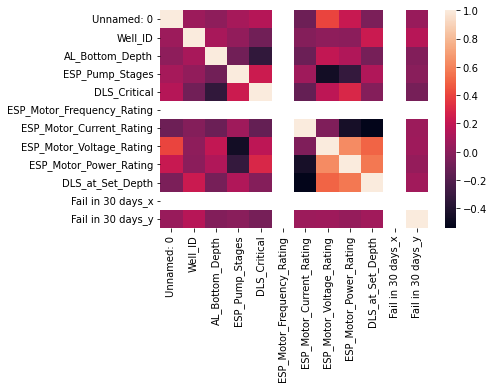

In [28]:
sns.heatmap(final_data.corr())

In [29]:
# Obtaining cumulatives of O/G ratio to capture the trend.

In [30]:
final_data_fail = final_data[final_data['Fail in 30 days_y'] == 1]

In [31]:
final_data_fail

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,Fail in 30 days_x,Fail in 30 days_y
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,0,1.0
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR,0,1.0
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038,ELECTRICAL,UNKNOWN,0,1.0
5,5,165,ESP_1,ESP,8894.94,267,16.324035,NaN,67.1,2626.0,270.0,NaN,TUBING,UNKNOWN,0,1.0
6,6,165,ESP_2,ESP,8814.55,351,23.472619,NaN,67.1,2626.0,270.0,NaN,ELECTRICAL,MOTOR,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,140,ESP_1,ESP,7868.16,284,22.458764,NaN,NaN,NaN,NaN,10.844553,PUMP,STAGE,0,1.0
161,161,341,ESP_1,ESP,7927.90,504,17.561921,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0,1.0
162,162,143,ESP_1,ESP,8041.24,0,12.231519,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,MOTOR,0,1.0
164,164,285,ESP_1,ESP,7958.81,415,12.924289,NaN,NaN,NaN,NaN,10.935088,ELECTRICAL,CABLE,0,1.0


In [ ]:
grouped_data=my_data.groupby(["Well_ID","AL_Key"])
array_life=np.array(grouped_data.size())

mega_matrix=np.array(grouped_data)
trest=mega_matrix[0][1]
trest[2:3]["OIL"]



In [32]:
failure_id = final_data_fail['Well_ID'].values

In [33]:
failure_id

array([345,  29,  71, 165, 165, 138, 138, 260,  47,  85,  85, 246, 118,
       126,   0,  49, 111,  77, 354,  10,  59, 107, 107, 352, 352,  54,
       346, 259, 351,  69,  30, 257, 147,  63,  52, 128, 113, 339, 339,
        73, 349,  35, 130, 263, 353, 353, 127,  70,  72,  97,  74,  81,
        81,  96,   4,   7, 109,  50,  50,  19, 100,  23,  89,  37, 102,
       132, 328, 350,  66,  82, 115,  11, 106, 158,  64,  55,   5,  28,
        80,  43, 103, 337, 330, 240, 217,  40,  68,  87,  48,  22,  51,
        42, 261,  14, 361,  92,   1, 120, 122, 121, 362, 362, 145, 145,
        65, 256, 256,  45,  15,  15,  18, 124, 247, 247,  75, 119, 134,
        33,  99, 252, 284, 140, 341, 143, 285, 142], dtype=int64)

In [34]:
daily

,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,AL_Key,Well_ID
0,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
1,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
2,1007.769762,1047.068544,667.933899,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
3,1514.641876,1370.143160,1122.137652,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
4,1089.741764,1387.138130,1156.169599,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50051,130.568357,335.639084,433.161488,ESP,0.0,232.000000,433.000000,894.599976,240.0,182.800003,55.000000,0.550000,20.000000,167.384209,444.562318,856.745525,611.946527,0.583339,0.537389,460.405623,396.339903,150.908634,184.730450,3004.191331,2598.063044,757.792307,0.059549,1703.463069,1746.331510,0.168102,18.724074,100.456000,0.207101,81.731926,168.679595,600.0,ESP_1,142
50052,135.061535,338.161005,421.979434,ESP,0.0,232.000000,433.000000,894.599976,240.0,182.800003,55.000000,0.550000,20.000000,173.144311,433.085059,858.684065,606.229370,0.586167,0.534518,458.981681,399.702384,150.441904,187.719102,3004.191331,2563.037417,754.692653,0.061011,1668.437442,1728.818696,0.171957,18.264067,100.456000,0.202013,82.191933,168.766911,600.0,ESP_1,142
50053,135.757477,341.732930,428.363835,ESP,0.0,230.433113,431.364779,893.432975,240.0,182.836947,55.000000,0.551651,20.133889,174.012642,439.638975,870.139131,613.651616,0.586430,0.533871,464.542110,405.597021,152.038065,189.694864,3004.191331,2556.744207,764.843078,0.062554,1663.311231,1725.088591,0.173214,18.452844,99.400729,0.206268,80.947885,168.672755,600.0,ESP_1,142
50054,64.788755,170.379740,221.002588,ESP,12.0,243.458937,423.202102,934.540501,240.0,186.748578,54.836954,0.549735,21.480732,83.449011,226.808990,413.161203,310.258001,0.571123,0.562801,232.527414,180.633789,80.110123,90.269617,3004.191331,2538.622702,380.889908,0.060600,1604.082202,1736.581602,0.162718,8.862240,103.032334,0.095571,94.170094,172.715382,600.0,ESP_1,142


In [35]:
# Checking for a trend

lst_time = []
lst_well = []
lst_al = []
temp = pd.DataFrame()

for i in range(len(failure_id)):
    sp = daily[daily['Well_ID']==failure_id[i]].copy()
    sp.reset_index()
    uni = (sp['AL_Key'].unique()[0])
    for j in range(len(sp['AL_Key'].unique())):
        uni = (sp['AL_Key'].unique()[j])
        print(j)
        sp2 = sp[sp['AL_Key']== uni ]
        sp2.reset_index()
        sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
        
        #print("Last 30 days")
        last = (sp2['GOR'].values)[-30:]
        #sns.lineplot(data = last)
        
        #print("First 30 days")
        first = (sp2['GOR'].values)[:30]
        #sns.lineplot(data= first)
        
        ln = len(sp2['GOR'].values) # Time length of each pump.
        
        
        #plt.figure()
        #plt.show()
        
        lst_well.append(failure_id[i])
        lst_al.append(uni)
        lst_time.append(ln)
    
    
time = np.array(lst_time)
wellid = np.array(lst_well)
al = np.array(lst_al)


0
0
0
0


C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1


C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
0
1
0
0
0
1


C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp2['GOR'] = (sp2['GAS']/sp2['OIL'])
C:\Users\Richard\AppData\Local\Temp\ipykernel_40840\2692863393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
time = np.array(lst_time)
wellid = np.array(lst_well)
al = np.array(lst_al)
failure_id.shape

In [ ]:
(sp['AL_Key'].unique()[0])

In [ ]:
# Count Unique values
sp['AL_Key'].value_counts()

In [ ]:
sp2